In [2]:
#setup
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz

from DecisionTree import Tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Zadanie 4.
Zbiór danych Mushroom (http://archive.ics.uci.edu/ml/datasets/Mushroom) zawiera informacje o grzybach i o tym czy są one jadalne, trujące, nie polecane do jedzenia lub nieznane. Zapoznaj się z tym zbiorem danych i stwórz drzewo decyzyjne określające jadalność grzybów na podstawie ich cech określonych w zestawie danych.

In [3]:
#load df
columns = [
 "target", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", 
 "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", 
 "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
 "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
 "ring-number", "ring-type", "spore-print-color", "population", "habitat", ]

# Use read_csv to load the data.
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
df = pd.read_csv(url, header=None, names=columns)

In [4]:
train_df, test_df = train_test_split(df, test_size=0.3333)
tree_gini = Tree(train_df, criterion='gini')
tree_entropy = Tree(train_df, criterion='infogain_ratio')

In [5]:
pred_gini, pred_entropy = [], []
for i in range(len(test_df)):
    pred_gini.append(tree_gini.classify(test_df.iloc[i]))
    pred_entropy.append(tree_entropy.classify(test_df.iloc[i]))

conf_gini = metrics.confusion_matrix(np.array(pred_gini), test_df['target'])
conf_entropy = metrics.confusion_matrix(np.array(pred_entropy), test_df['target'])

print('Cofussion matrix for gini', conf_gini)
print('Cofussion matrix for entropy', conf_entropy)

Cofussion matrix for gini [[1400    0]
 [   0 1308]]
Cofussion matrix for entropy [[1400    0]
 [   0 1308]]


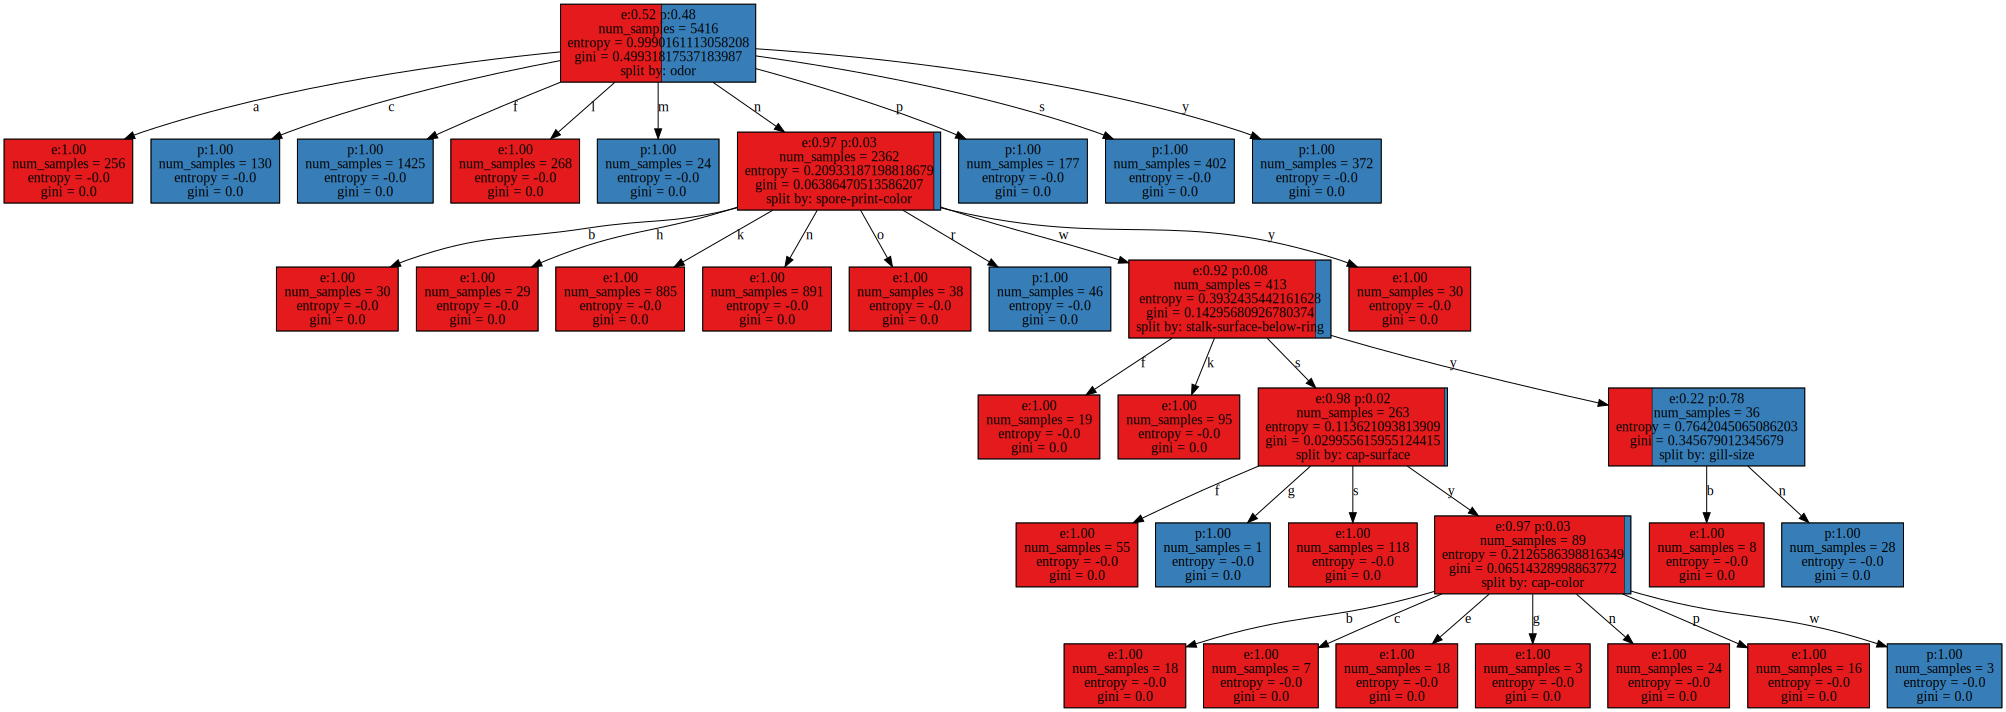

In [6]:
tree_gini.draw()

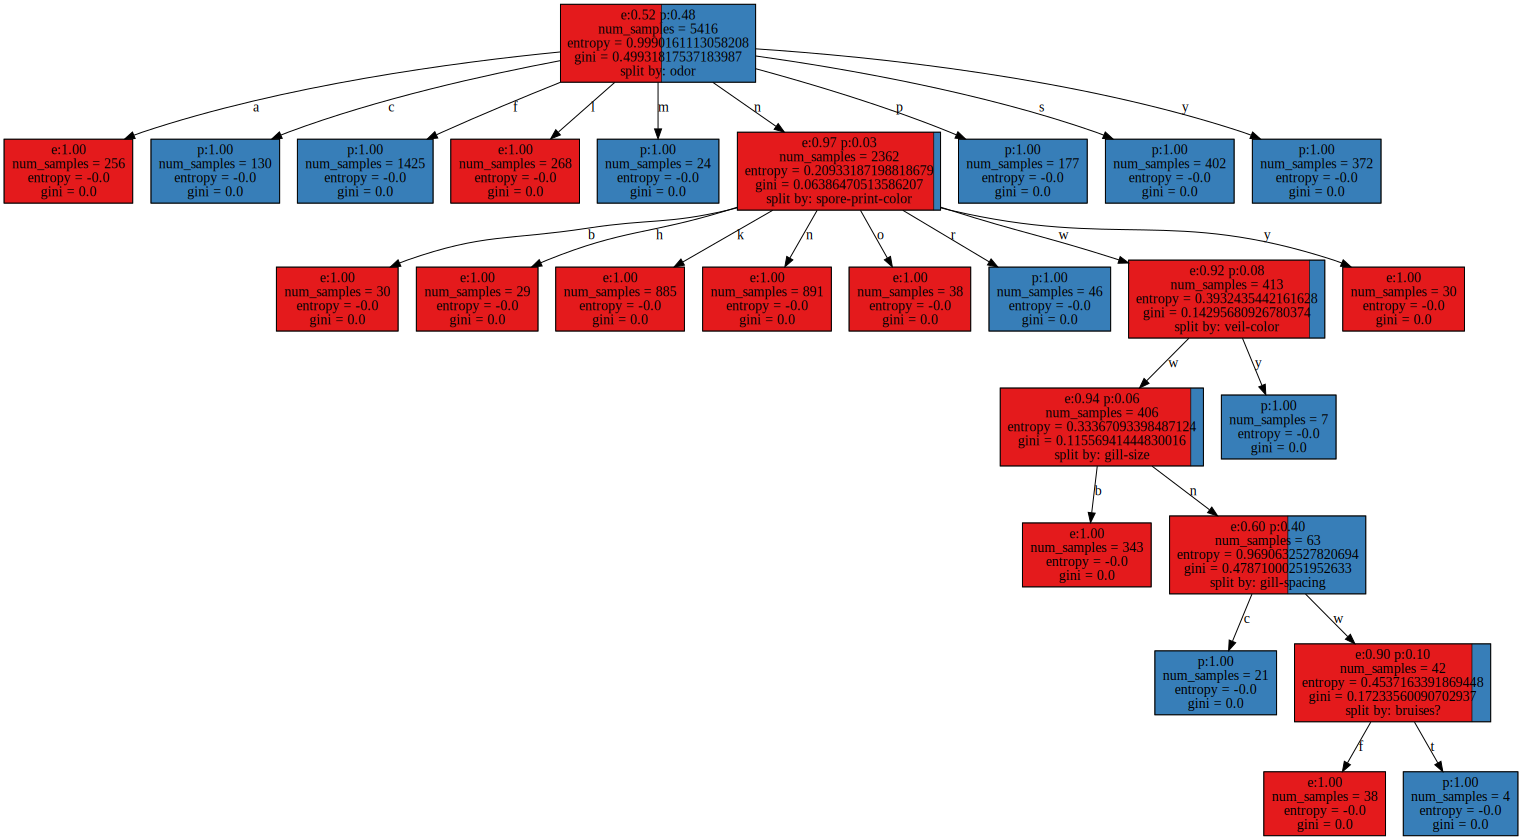

In [7]:
tree_entropy.draw()

### Let's try to prune it

In [8]:
tree_gini.prune_with_confidence_interval()
tree_entropy.prune_with_confidence_interval()

In [9]:
pred_gini, pred_entropy = [], []
for i in range(len(test_df)):
    pred_gini.append(tree_gini.classify(test_df.iloc[i]))
    pred_entropy.append(tree_entropy.classify(test_df.iloc[i]))
    
conf_gini = metrics.confusion_matrix(np.array(pred_gini), test_df['target'])
conf_entropy = metrics.confusion_matrix(np.array(pred_entropy), test_df['target'])

print('Cofussion matrix for prunned gini', conf_gini)
print('Cofussion matrix for prunned entropy', conf_entropy)

Cofussion matrix for prunned gini [[1400    0]
 [   0 1308]]
Cofussion matrix for prunned entropy [[1400    0]
 [   0 1308]]


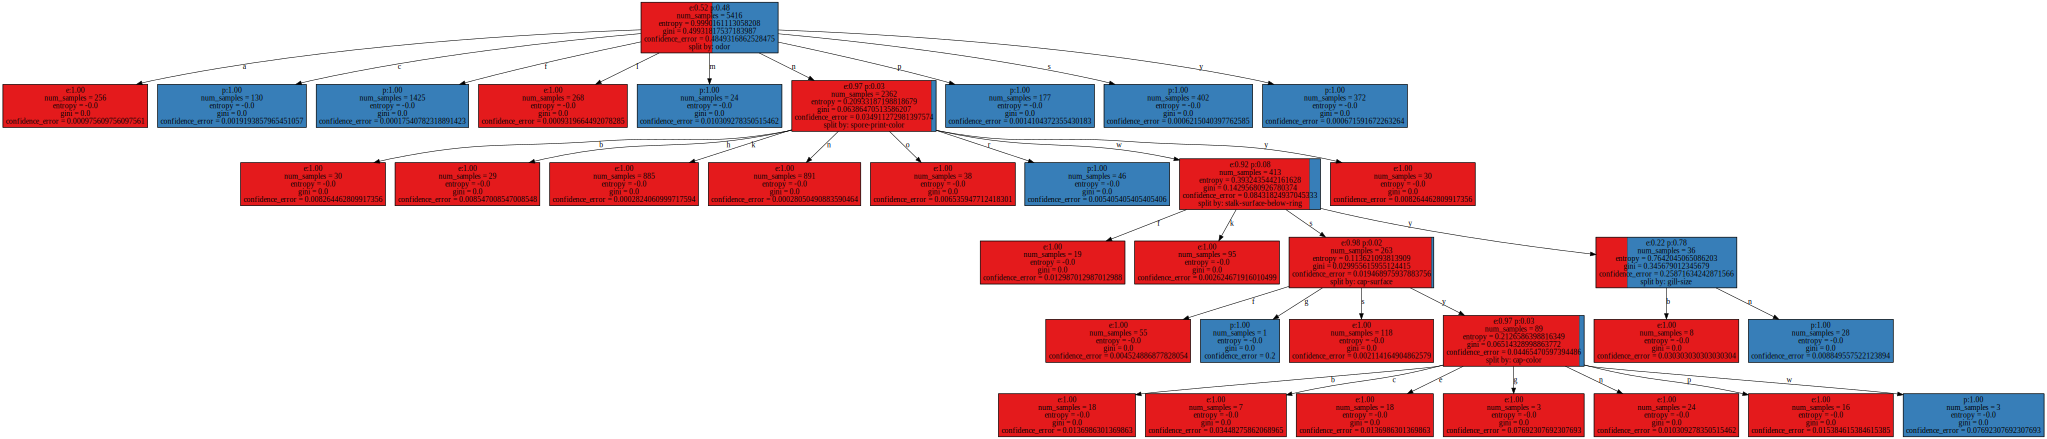

In [10]:
tree_gini.draw()

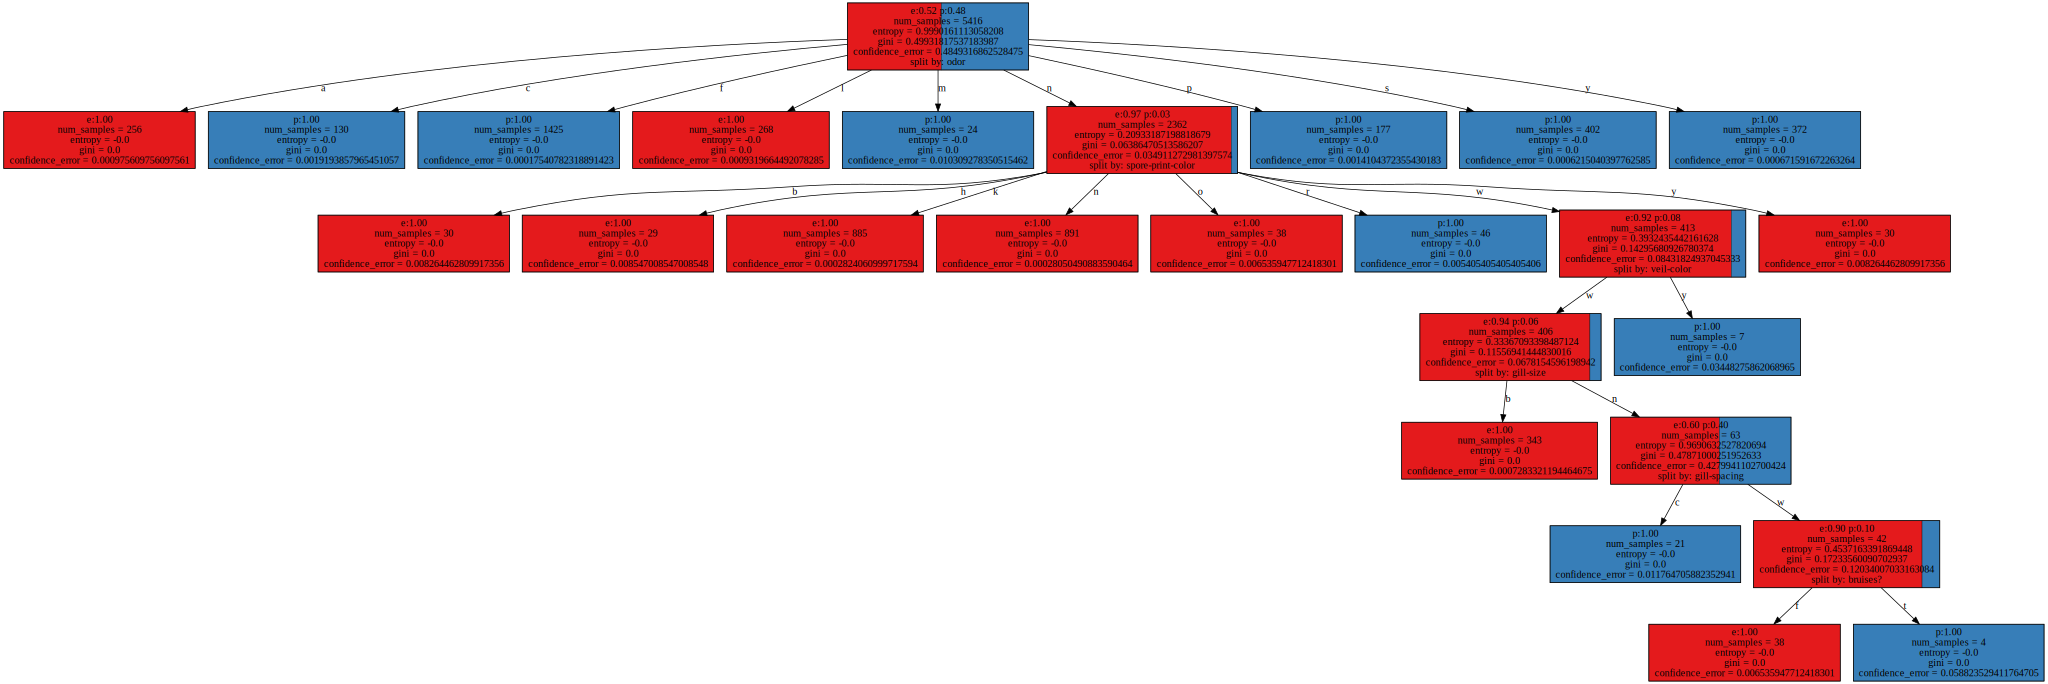

In [11]:
tree_entropy.draw()